In [1]:
import numpy as np
1.5*0.2938e-3*np.sqrt(373*461)/101325

1.803562997914721e-06

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Data/k.csv')
df['$k$ [m/s]'] = df['$k$ [m/s]'].fillna(0)
df.loc[df['$k$ [m/s]'] > 0, '$k$ [m/s]'] = 1
# print(df)
X=np.array([df['Ambient Pressure [Pa]'],df['dT [K]']]).T
print(X)

[[1.01300000e+05 1.00000000e+00]
 [1.01300000e+05 1.79591837e+00]
 [1.01300000e+05 2.59183673e+00]
 ...
 [4.01300000e+05 3.84081633e+01]
 [4.01300000e+05 3.92040816e+01]
 [4.01300000e+05 4.00000000e+01]]


4.646464646464646


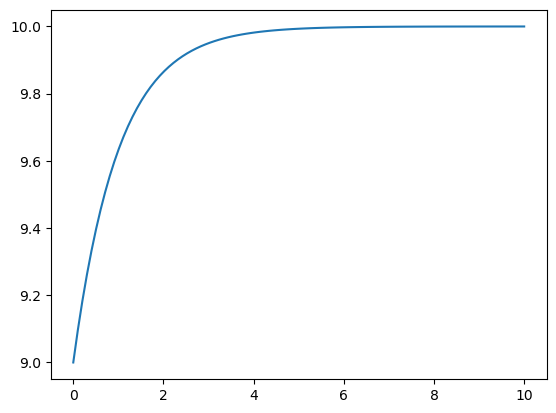

In [12]:
t=np.linspace(0,10,100)
y=-np.exp(-t)+10
plt.plot(t,y)
print(t[np.abs(y-y[-1])<0.01][0])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
F = lambda t, r: (4*(T_inf-T_wall)/(958.65*2256.4*10**(3)))*((1-(var_dict['r_min']/r))/((2/var_dict['h_int'])+(r*(1-np.cos(theta*np.pi/180))/var_dict['k_copp'])))*((1-np.cos(theta*np.pi/180))/(2-3*np.cos(theta*np.pi/180)+np.cos(theta*np.pi/180)**(3)))


min droplet radius: 2.0820544278581426e-08
Surface tension: 0.06106
h_int: 153552.1665376742
[1.60136740e-05 4.17035898e-05 6.72709224e-05 ... 3.10278609e-03
 3.10278581e-03 3.10278581e-03]
test


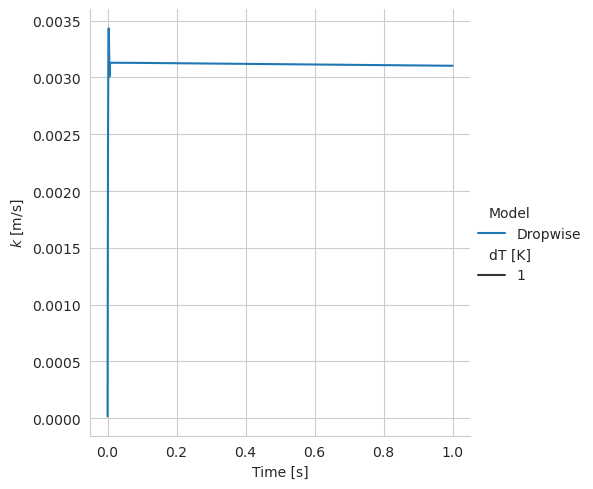

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import dropwise
Q = [5e-6]
Temp_diff=[1]

df_condense= pd.DataFrame()
# for i in Q:
dropwise_step=1e-5    
for dT in Temp_diff:
    dict=dropwise.Condense(T_wall=373-dT,theta=10,endtime=1,step=dropwise_step)
        
    print(dict['k_slope'][0])
    dummy_dict_c={'Time [s]':pd.Series([dict['time'][0]]),
                '$r_{s}$ [m]':pd.Series([dict['r'][0]]),
                '$k$ [m/s]':pd.Series([dict['k_slope'][0]]),
                'dT [K]':[dT],
                'Model':['Dropwise']}
    

    
    df_c = pd.DataFrame(dummy_dict_c)
    df_condense = pd.concat([df_condense, df_c])



df_condense = df_condense.set_index(['dT [K]','Model']).apply(pd.Series.explode).reset_index()
print('test')
sns.set_style("whitegrid")

TT=sns.relplot(x='Time [s]',
              y="$k$ [m/s]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
# sns.move_legend(g, "lower right", bbox_to_anchor=(0.65, 0.82),frameon=True)
# for ax, label in zip(g.axes.flat, ["(a)", "(b)", "(c)", "(d)"]):
#     ax.text(-0.07, 1.05, label, transform=ax.transAxes, fontsize=11, va='top')
# g.savefig('../Reports/Progress_report/Figures/r_s.pdf')
# TT.set(xscale="log")
# TT.set(yscale="log")

plt.show()


test


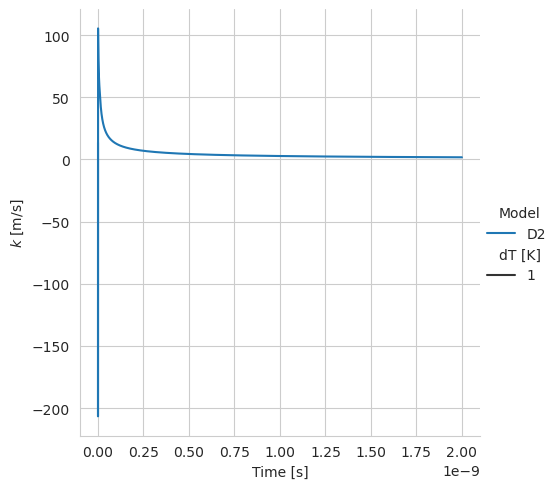

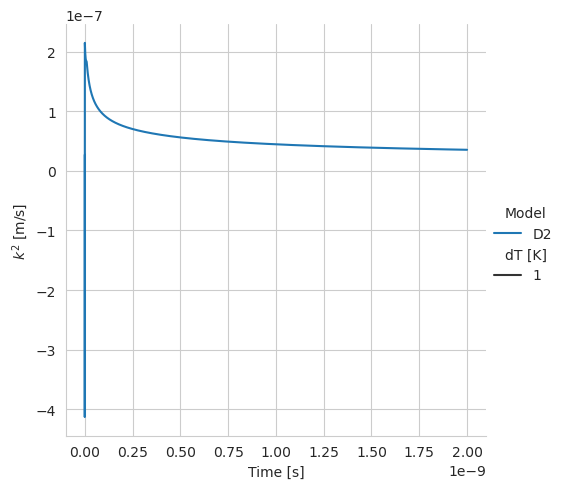

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import main

Q = [5e-6]
Temp_diff=[1]

df_condense= pd.DataFrame()
# for i in Q:
dropwise_step=1e-5    
for dT in Temp_diff:
    dict=main.D2(Q_ext=Q[0],T_s=372-dT,delta_t=10**(-15),r_s0=10**(-9))
        
    
    dummy_dict_c={'Time [s]':pd.Series([dict['time']]),
                '$r_{s}$ [m]':pd.Series([dict['rs']]),
                '$r_{s}^2$ [m]':pd.Series([np.power(dict['rs'],2)]),
                '$k$ [m/s]':pd.Series(dict['k_slope']),
                '$k^2$ [m/s]':pd.Series(dict['k_sq']),
                'dT [K]':[dT],
                'Model':['D2']}
    

    
    df_c = pd.DataFrame(dummy_dict_c)
    df_condense = pd.concat([df_condense, df_c])



df_condense = df_condense.set_index(['dT [K]','Model']).apply(pd.Series.explode).reset_index()
print('test')
sns.set_style("whitegrid")

TT=sns.relplot(x='Time [s]',
              y="$k$ [m/s]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
Ts=sns.relplot(x='Time [s]',
              y="$k^2$ [m/s]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
# sns.move_legend(g, "lower right", bbox_to_anchor=(0.65, 0.82),frameon=True)
# for ax, label in zip(g.axes.flat, ["(a)", "(b)", "(c)", "(d)"]):
#     ax.text(-0.07, 1.05, label, transform=ax.transAxes, fontsize=11, va='top')
# g.savefig('../Reports/Progress_report/Figures/r_s.pdf')
# TT.set(xscale="log")
# TT.set(yscale="log")

plt.show()

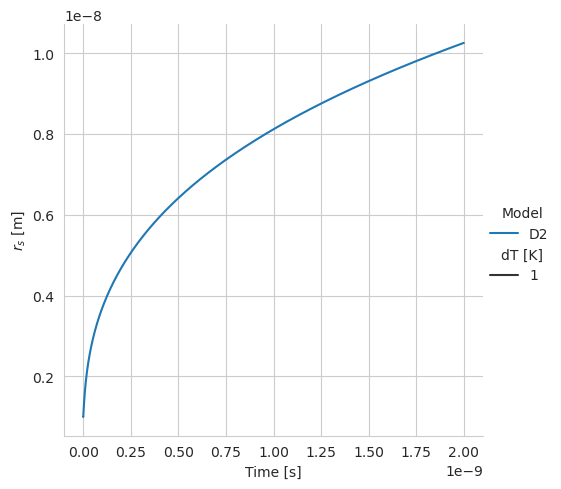

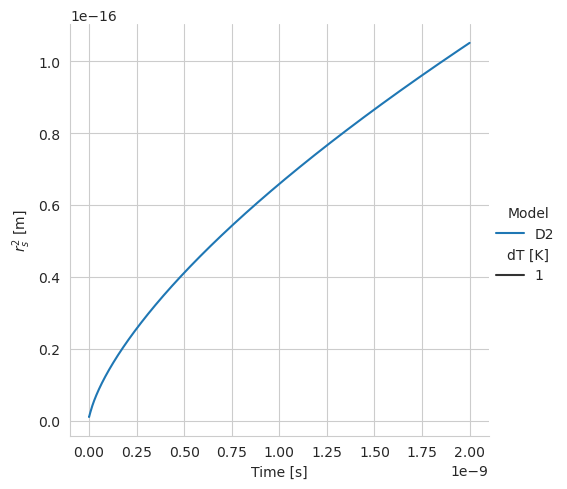

In [2]:
sns.set_style("whitegrid")

TT=sns.relplot(x='Time [s]',
              y="$r_{s}$ [m]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
Ts=sns.relplot(x='Time [s]',
              y="$r_{s}^2$ [m]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
# sns.move_legend(g, "lower right", bbox_to_anchor=(0.65, 0.82),frameon=True)
# for ax, label in zip(g.axes.flat, ["(a)", "(b)", "(c)", "(d)"]):
#     ax.text(-0.07, 1.05, label, transform=ax.transAxes, fontsize=11, va='top')
# g.savefig('../Reports/Progress_report/Figures/r_s.pdf')
# TT.set(xscale="log")
# TT.set(yscale="log")

plt.show()

test


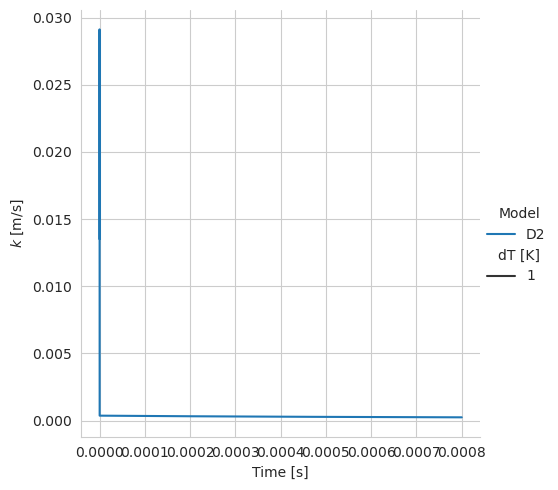

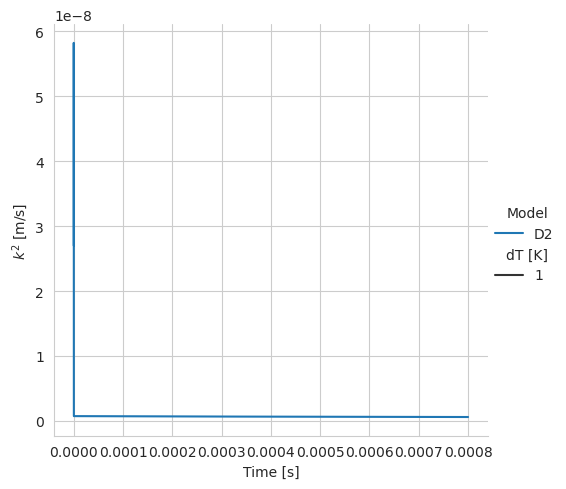

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import main

Q = [0.00001]
Temp_diff=[1]

df_condense= pd.DataFrame()
# for i in Q:
dropwise_step=1e-5    
for dT in Temp_diff:
    dict=main.D2(Q_ext=Q[0],T_s=372-dT,delta_t=10**(-9),r_s0=10**(-6))
        
    
    dummy_dict_c={'Time [s]':pd.Series([dict['time']]),
                '$r_{s}$ [m]':pd.Series([dict['rs']]),
                '$r_{s}^2$ [m]':pd.Series([np.power(dict['rs'],2)]),
                '$k$ [m/s]':pd.Series(dict['k_slope']),
                '$k^2$ [m/s]':pd.Series(dict['k_sq']),
                'dT [K]':[dT],
                'Model':['D2']}
    

    
    df_c = pd.DataFrame(dummy_dict_c)
    df_condense = pd.concat([df_condense, df_c])



df_condense = df_condense.set_index(['dT [K]','Model']).apply(pd.Series.explode).reset_index()
print('test')
sns.set_style("whitegrid")

TT=sns.relplot(x='Time [s]',
              y="$k$ [m/s]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
Ts=sns.relplot(x='Time [s]',
              y="$k^2$ [m/s]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
# sns.move_legend(g, "lower right", bbox_to_anchor=(0.65, 0.82),frameon=True)
# for ax, label in zip(g.axes.flat, ["(a)", "(b)", "(c)", "(d)"]):
#     ax.text(-0.07, 1.05, label, transform=ax.transAxes, fontsize=11, va='top')
# g.savefig('../Reports/Progress_report/Figures/r_s.pdf')
# TT.set(xscale="log")
# TT.set(yscale="log")

plt.show()

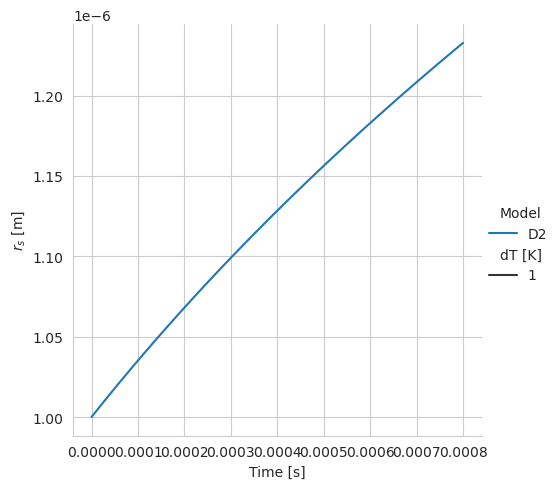

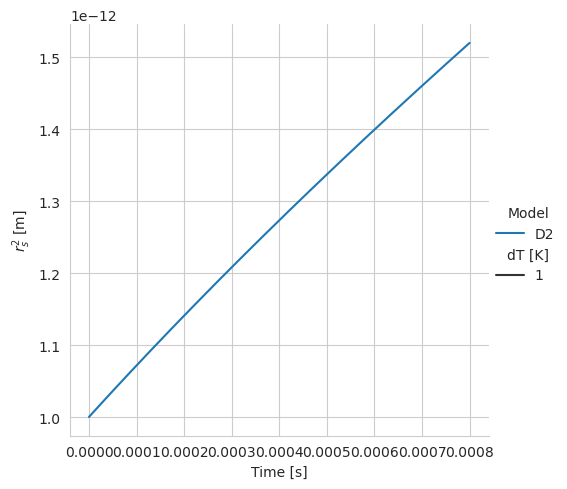

In [2]:
sns.set_style("whitegrid")

TT=sns.relplot(x='Time [s]',
              y="$r_{s}$ [m]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
Ts=sns.relplot(x='Time [s]',
              y="$r_{s}^2$ [m]",
              data=df_condense,
              hue='Model',
              kind="line",
              palette='tab10',
              style='dT [K]'
              )
# sns.move_legend(g, "lower right", bbox_to_anchor=(0.65, 0.82),frameon=True)
# for ax, label in zip(g.axes.flat, ["(a)", "(b)", "(c)", "(d)"]):
#     ax.text(-0.07, 1.05, label, transform=ax.transAxes, fontsize=11, va='top')
# g.savefig('../Reports/Progress_report/Figures/r_s.pdf')
# TT.set(xscale="log")
# TT.set(yscale="log")

plt.show()

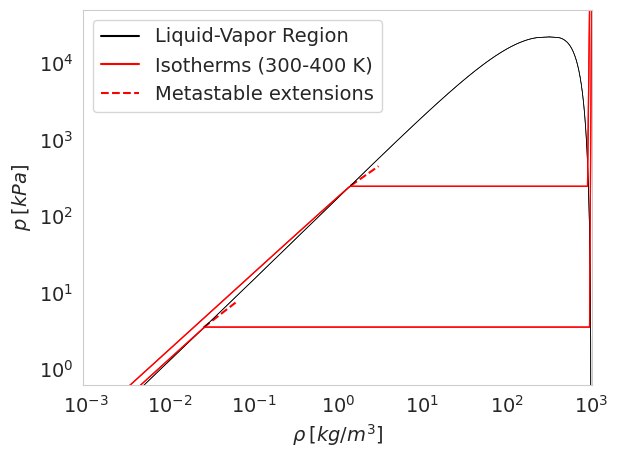

In [6]:
import CoolProp
from CoolProp.Plots import PropertyPlot
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.rc('font', size=14) 
plot = PropertyPlot('Water', 'PRho')
plot.calc_isolines(CoolProp.iQ, num=2)
plot.calc_isolines(CoolProp.iT,  num=2,iso_range=[300,400],rounding =True)
plot.xlabel(r'$\rho\:[kg/m^{3}]$')
plot.ylabel(r'$p\:[kPa]$')
ax = plot.axis
# ax.set_yscale('linear')
# ax.set_xscale('linear')
plot.props[CoolProp.iT]['color'] = 'red'
plot.props[CoolProp.iT]['lw'] = '0.9'
plot.grid()
ax.plot([1.4, 3],[2.5e2,4.5e2],color='red',linestyle='--')
ax.plot([2.5e-2, 6e-2],[3.5,7.4],color='red',linestyle='--')
ax.plot([], [], linestyle='-', color='k', label='Liquid-Vapor Region')
ax.plot([], [], linestyle='-', color='r', label='Isotherms (300-400 K)')
ax.plot([], [], linestyle='--', color='r', label='Metastable extensions')
ax.legend(loc='upper left')
plot.draw()
plot.savefig('Plots/metastable_ext.png',transparent=True)

2.6511556221123287e-06


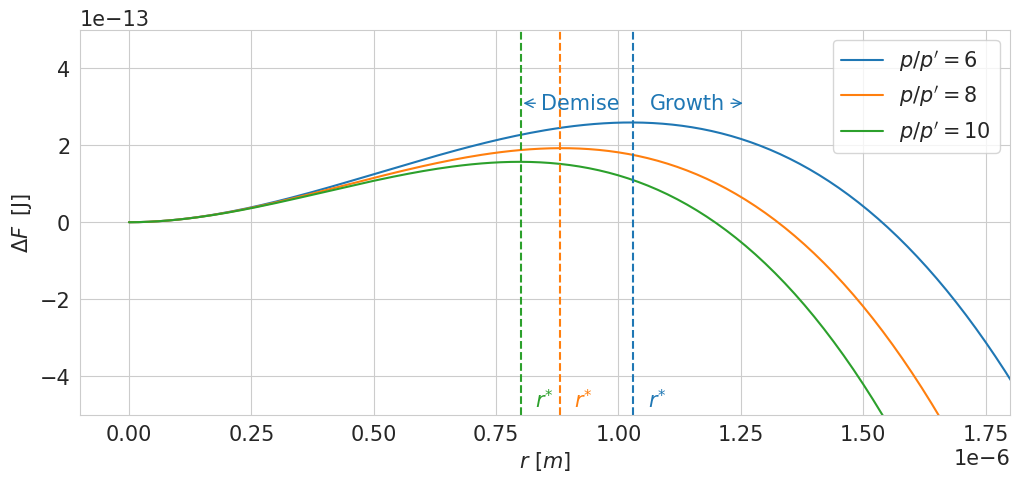

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

r=np.arange(0,2e-6,1e-8)
F1=0.0588*4*np.pi*r**(2)-(4/3)*np.pi*287*373*0.5978*np.log(6)*r**(3)
F2=0.0588*4*np.pi*r**(2)-(4/3)*np.pi*287*373*0.5978*np.log(8)*r**(3)
F3=0.0588*4*np.pi*r**(2)-(4/3)*np.pi*287*373*0.5978*np.log(10)*r**(3)


r_crit=(2*0.0588)/(287*373*0.5978*np.log(2))
print(r_crit)
sns.set_style("whitegrid")
fig_k = plt.figure(figsize=(12,5))
plt.rc('font', size=15)
ax = fig_k.add_subplot(1, 1, 1)
ax.plot(r,F1,label=r"$p/p'= 6$")
ax.plot(r,F2,label=r"$p/p'= 8$")
ax.plot(r,F3,label=r"$p/p'= 10$")
ax.set_ylabel('$\Delta F\:$ [J]')
ax.set_xlabel('$r$ [$m$]')
ax.set_xlim([-1e-7,1.8e-6])
ax.set_ylim([-0.5e-12,0.5e-12])
ax.legend()
ax.axvline(x=r[np.argmax(F1)],linestyle='--',color='#1f77b4')
ax.axvline(x=r[np.argmax(F2)],linestyle='--',color= '#ff7f0e')
ax.axvline(x=r[np.argmax(F3)],linestyle='--',color= '#2ca02c')
ax.annotate('Demise', xy=(r[np.argmax(F1)]-0.23e-6, np.max(F1)+0.05e-12), xycoords='data',
            xytext=(15, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='#1f77b4'), ha='left', va='center',color='#1f77b4')
ax.annotate('Growth', xy=(r[np.argmax(F1)]+0.23e-6, np.max(F1)+0.05e-12), xycoords='data',
            xytext=(-15, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='#1f77b4'), ha='right', va='center',color='#1f77b4')
ax.annotate('$r^{*}$', xy=(r[np.argmax(F1)]+0.11e-6, -4.6e-13), xycoords='data',
            xytext=(-15, 0), textcoords='offset points',
             ha='right', va='center',color='#1f77b4')
ax.annotate('$r^{*}$', xy=(r[np.argmax(F2)]+0.11e-6, -4.6e-13), xycoords='data',
            xytext=(-15, 0), textcoords='offset points',
             ha='right', va='center',color='#ff7f0e')
ax.annotate('$r^{*}$', xy=(r[np.argmax(F3)]+0.11e-6, -4.6e-13), xycoords='data',
            xytext=(-15, 0), textcoords='offset points',
             ha='right', va='center',color='#2ca02c')
fig_k.savefig('Plots/crit_rad_homo.png',transparent=True)

/home/omagen/Proj/Codes/functions.py:46: RuntimeWarning: overflow encountered in exp
  Y=get_Y(get_sat_press(T,p),p)*np.exp((2*water_mol_weight*sigma)/(6.022e23*1.3806e-23*T*get_rho_l(T)*R))


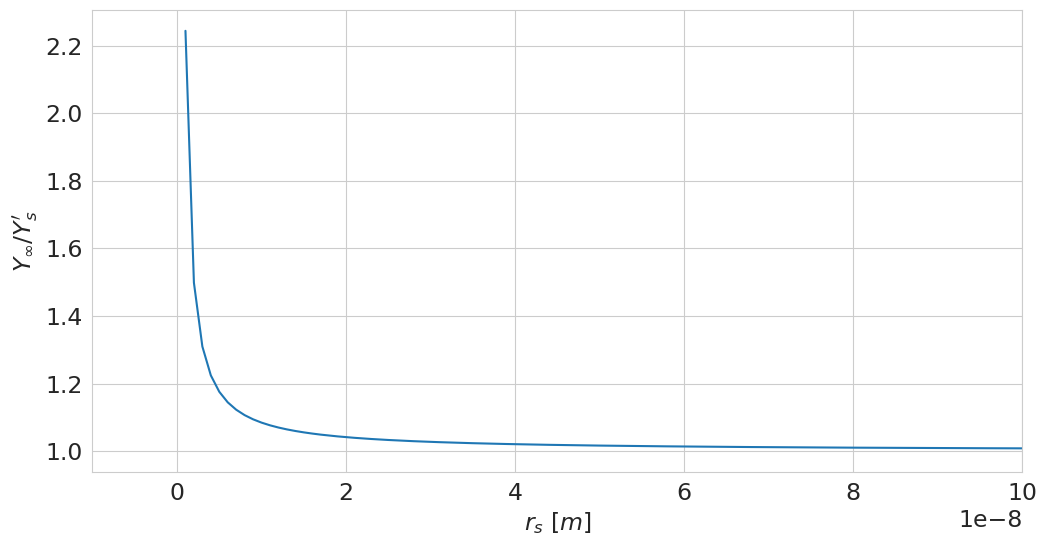

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as func

r=np.arange(1e-12,1e-6,1e-9)
Y_inf=func.get_super_Y(350,25000,r)



sns.set_style("whitegrid")
fig_k = plt.figure(figsize=(12,6))
ax = fig_k.add_subplot(1, 1, 1)
ax.plot(r,Y_inf/func.get_Y(func.get_sat_press(350,1),25000))
plt.rc('font', size=17) 
ax.set_ylabel("$Y_{\infty}/Y_{s}'$")
ax.set_xlabel('$r_{s}$ [$m$]')
ax.set_xlim([-0.01e-6,1e-7])
# ax.set_ylim([-0.5e-12,0.5e-12])
# ax.legend()
# ax.axvline(x=r[np.argmax(F1)],linestyle='--',color='#1f77b4')
# ax.axvline(x=r[np.argmax(F2)],linestyle='--',color= '#ff7f0e')
# ax.axvline(x=r[np.argmax(F3)],linestyle='--',color= '#2ca02c')
fig_k.savefig('../Reports/Final_report/Figures/Kelvin_supersat.pdf')
fig_k.savefig('Plots//Kelvin_supersat.png',transparent=True)

In [1]:
import main
import matplotlib.pyplot as plt
step=1e-11
endtime=1e-6
dT=10
dict2 = main.D2(Q_ext=0,T_s=350+dT,T_inf=350,delta_t=step,r_s0=1e-6,endtime=endtime,cond=False) 
dict3 = main.D2(Q_ext=0,T_s=350+dT,T_inf=350,delta_t=step,r_s0=1e-6,endtime=endtime,cond=True) 


[0.4971817717170554]
[0.4971817717170554]


In [6]:
import numpy as np
r = 0
for i in range(1, 10):
    r=i+r
    print(r)

1
3
6
10
15
21
28
36
45


In [12]:
from CoolProp.CoolProp import PropsSI
print(PropsSI('H','T', 274, 'P', 101325,'IF97::Water'))

3646.269338940298
